# $Clase \ 20-Octubre-2020$

In [9]:
#G = nx.Graph()
#G.add_nodes_from([1,2,3,4,5,6])
#G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(3,5),(5,6)])
#nx.draw(G,with_labels=True)

#nx.betweenness_centrality(G, normalized=False, endpoints=True)
#En networkx no se toman las geodésicas que van de un vértice a sí mismo.
#Tampoco cuenta como 2 cada camino.

In [2]:
#Centralidad armónica.
#nx.harmonic_centrality(G)

In [8]:
#nx.draw(G, pos = position)
#nx.draw(G, pos = position, node_color = "purple", node_shape = "*")

<Figure size 576x576 with 0 Axes>

# Clustering

#### Coeficiente de acumulación, nos permite qué tanto se forma un cúmulo. Grupos de elementos unidos.
#### Medida de la densidad de una red.
#### Que tanto mis vecinos están conectados.

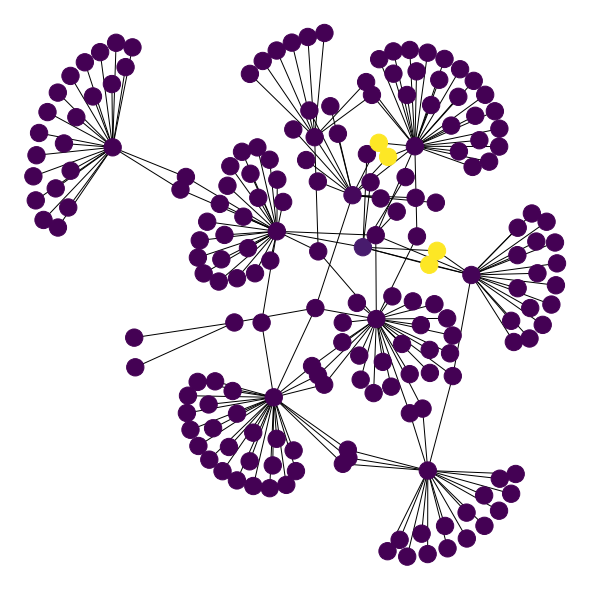

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#Este es el nombre del archivo.
archivo = "bn-mouse_visual-cortex_2.edges"

#Importamos el archivo usando pandas.
datos = pd.read_csv(archivo, 
                    #rows = 10, 
                    header = None, 
                    sep = " ")

#En esta línea se guardan los datos de pandas en una variable del tipo networkx.
G = nx.from_pandas_edgelist(datos, source = 0, target = 1 )

#plt.figure(figsize=[8,8])
#nx.draw_kamada_kawai(G)

diccionario = nx.clustering(G)
clus = np.array([diccionario[i] for i in G])

position = nx.layout.kamada_kawai_layout(G)

plt.figure(figsize=[8,8])
nx.draw(G, pos = position, node_color = clus)
#plt.savefig('Mouse_visual_cortex_clustering', dpi = 150)

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#Este es el nombre del archivo.
archivo = "bn-mouse_visual-cortex_2.edges"

#Importamos el archivo usando pandas.
datos = pd.read_csv(archivo, 
                    nrows = 10, 
                    header = None, 
                    sep = " ")
datos

,0,1
0,1,4
1,1,14
2,1,15
3,1,16
4,1,17
5,1,18
6,2,7
7,2,82
8,2,152
9,2,153


# Medidas Globales de la red

#### Distribución de grado

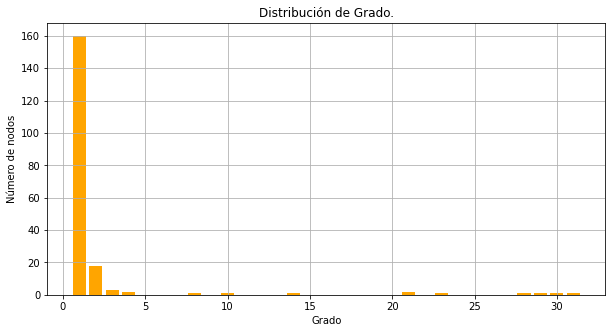

In [22]:
#Este comando nos da el grado de los nodos, es un diccionario.
diccionario = dict(G.degree)

#Se almacenan los datos de los grados en una lista.
#Solo se está tomando el grado, no el nodo.
grados = [diccionario[i] for i in G]

#Se crea un diccionario vacío.
distribucion = {}

#Este comando es una especie de filtro para tomar el grado de los nodos.
for i in grados:
    distribucion[i]=0
    
for i in grados:
    distribucion[i]+=1

#Número de nodos n que tienen grado m.
#Los nodos que tienen cierto grado.
x = distribucion.keys()
y = distribucion.values()

#Se grafica en un histograma los datos.
plt.figure(figsize=[10,5])
plt.bar(x,y, color = "orange")
plt.title("Distribución de Grado.")
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.grid()
plt.savefig('Mouse_visual_cortex_degree_distribution', dpi = 200)
plt.show()